<a href="https://colab.research.google.com/github/UrMo04/Proyecto-Estructuras-Tema-6/blob/main/Proyecto_estructuras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**ENTREGA FINAL - PROYECTO DE CLASE**

Subgrupo 6

Integrantes:
* Sofía Victoria Vega - 2230041
* Uriel Muñoz Oliveros - 2202348
* José Augusto Quintero - 2202348
* Camilo Andrés Herrera - 2231530



**Tema:**
*Sistema de Gestión de Empleados*: Diseñar un sistema de gestión de empleados para organizar la información de los empleados. Implementar funciones que faciliten la rotación de empleados y la asignación de responsabilidades en un
equipo.


In [2]:
#Constructor de la clase empleado
class Employee:
  def __init__(self, Nombre, Rol, Cedula, Salario, Equipo ):
      self.Nombre = Nombre
      self.Cedula = Cedula
      self.Salario = Salario
      self.Rol = Rol
      self.Equipo = Equipo

#Método para obtener toda la información del empleado
  def getInfo(self):

      return (f"""Empleado:
                  Nombre: {self.Nombre}
                  Especialidad: {self.Rol}
                  Equipo: {self.Equipo}
                  Documento de identidad: {self.Cedula}
                  Salario: {self.Salario}
              """)



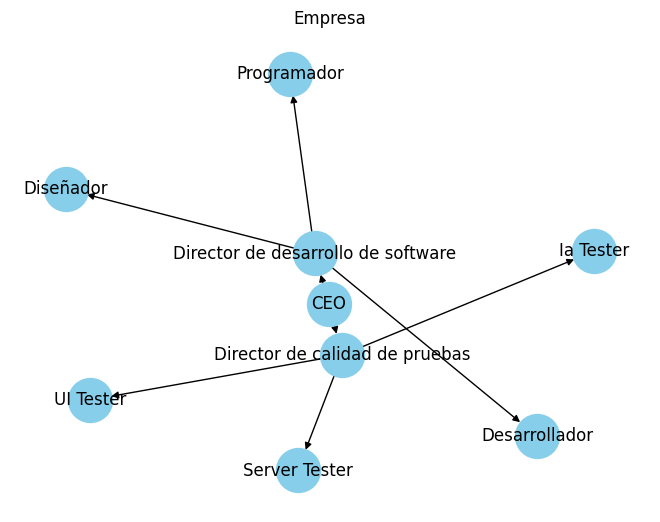

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

Empresa = nx.DiGraph()
#Se agregan todos los empleados a una lista
empleados = [
    {"nombre": "Empleado1", "cedula": "12345671", "salario": 50000, "rol": "CEO", "equipo": "Director", "color": "azul"},
    {"nombre": "Empleado2", "cedula": "12345672", "salario": 50000, "rol": "Director de desarrollo de software", "equipo": "Lider de desarrollo de software","color": "verde"},
    {"nombre": "Empleado3", "cedula": "12345673", "salario": 50000, "rol": "Desarrollador", "equipo": "Desarrollo de software","color": "verde"},
    {"nombre": "Empleado4", "cedula": "12345674", "salario": 50000, "rol": "Programador", "equipo": "Desarrollo de software","color": "verde"},
    {"nombre": "Empleado5", "cedula": "12345675", "salario": 50000, "rol": "Diseñador", "equipo": "Desarrollo de software","color": "verde"},
    {"nombre": "Empleado1", "cedula": "12345676", "salario": 50000, "rol": "Director de calidad de pruebas", "equipo": "Lider de calidad de pruebas"},
    {"nombre": "Empleado1", "cedula": "12345677", "salario": 50000, "rol": "UI Tester", "equipo": "Calidad de pruebas"},
    {"nombre": "Empleado1", "cedula": "12345678", "salario": 50000, "rol": "Server Tester", "equipo": "Calidad de pruebas"},
    {"nombre": "Empleado1", "cedula": "12345679", "salario": 50000, "rol": "Ia Tester", "equipo": "Calidad de pruebas"},
]

#Se crean todos los empleados y se agregan al grafo
for emp in empleados:
    e = Employee(emp["nombre"], emp["rol"], emp["cedula"], emp["salario"], emp["equipo"])
    Empresa.add_node(emp["rol"], empleado=e)

#Se agregan las aristas que conectan al CEO y a los directores
Empresa.add_edge(Empresa.nodes().get("CEO")["empleado"].Rol, Empresa.nodes().get("Director de desarrollo de software")["empleado"].Rol)
Empresa.add_edge(Empresa.nodes().get("CEO")["empleado"].Rol, Empresa.nodes().get("Director de calidad de pruebas")["empleado"].Rol)

#Se agregan las aristas que conectan a los directores y a sus respectivos trabajadores
for emp in Empresa.nodes():
  if Empresa.nodes().get(emp)["empleado"].Equipo == "Desarrollo de software":
    Empresa.add_edge(Empresa.nodes().get("Director de desarrollo de software")["empleado"].Rol, Empresa.nodes().get(emp)["empleado"].Rol)
  elif Empresa.nodes().get(emp)["empleado"].Equipo == "Calidad de pruebas":
    Empresa.add_edge(Empresa.nodes().get("Director de calidad de pruebas")["empleado"].Rol, Empresa.nodes().get(emp)["empleado"].Rol)

DesarrolloSoftware = Empresa.subgraph([])
CalidadDePruebas = Empresa.subgraph([])

options = {
    'node_color': 'skyblue',  # Color de los nodos
    'node_size': 1000,        # Tamaño de los nodos
    'with_labels': True       # Mostrar etiquetas de nodos
        }

nx.draw(Empresa, pos = nx.spring_layout(Empresa), **options)
plt.title("Empresa")
plt.show()

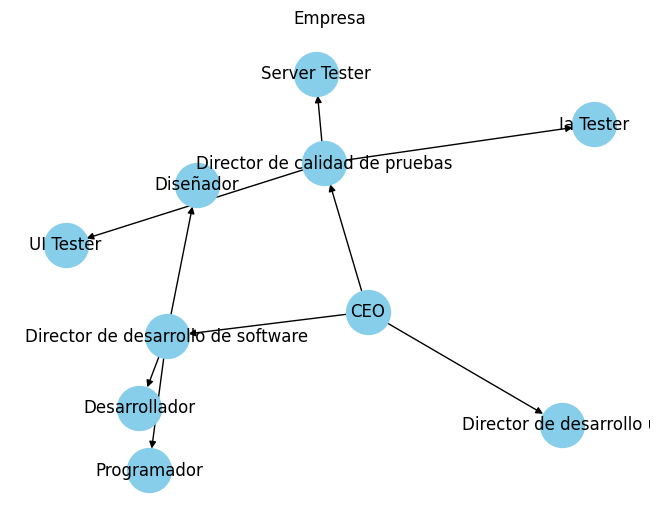

In [10]:
#Método para agregar equipos. Se necesita crear un empleado que sea Director de ese grupo

def addTeam(nombre, cedula, salario, nombreDeEquipo):

  rol = "Director de " + str(nombreDeEquipo).lower()

  liderNombre = "Lider de " + str(nombreDeEquipo).capitalize()

  e = Employee(nombre, rol, cedula, salario, liderNombre)

  Empresa.add_node(e.Rol, empleado=e)
  Empresa.add_edge("CEO", e.Rol)

addTeam("dir2", "123323", 500000, "Desarrollo UI")

options = {
    'node_color': 'skyblue',  # Color de los nodos
    'node_size': 1000,        # Tamaño de los nodos
    'with_labels': True       # Mostrar etiquetas de nodos
        }

nx.draw(Empresa, pos = nx.spring_layout(Empresa), **options)
plt.title("Empresa")
plt.show()

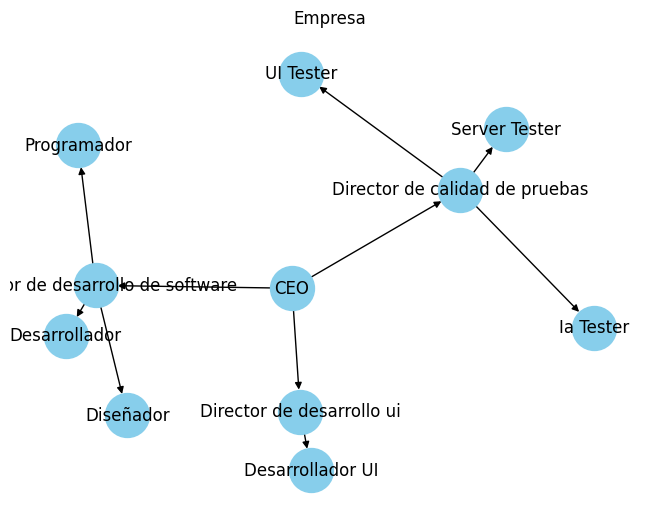

In [11]:
#Método para agregar nuevos empleados al grafo
#El esquema de empleado es: Nombre, rol, cedula, salario y equipo

def addNode(nombre, rol, cedula, salario, equipo):

  listaRoles = Empresa.nodes()
  fixedRol = rol
  fixedCounter=0
  for r in listaRoles:
    if rol in r:
      fixedCounter+=1
      fixedRol=rol+str(fixedCounter)

  e = Employee(nombre, fixedRol, cedula, salario, equipo)

  Empresa.add_node(e.Rol, empleado=e)

  Empresa.add_edge(Empresa.nodes().get("Director de " + e.Equipo.lower())["empleado"].Rol, Empresa.nodes().get(e.Rol)["empleado"].Rol)

addNode("emp2", "Desarrollador UI", "12232233", 300000, "Desarrollo UI")

options = {
    'node_color': 'skyblue',  # Color de los nodos
    'node_size': 1000,        # Tamaño de los nodos
    'with_labels': True       # Mostrar etiquetas de nodos
        }

nx.draw(Empresa, pos = nx.spring_layout(Empresa), **options)
plt.title("Empresa")
plt.show()

In [12]:
#Método para buscar empleados por cédula

def buscarEmpleado(cedula):

  listaNodo = Empresa.nodes()


  for emp in listaNodo:
    if Empresa.nodes().get(emp)["empleado"].Cedula == cedula:
      print("a")
      return Empresa.nodes().get(emp)["empleado"]

  return None

print(Empresa.nodes().get("Desarrollador")["empleado"].Cedula)

e = buscarEmpleado("123323")
if e is not None:
  print(e.getInfo())
else:
  print("No existe")

12345673
a
Empleado:
                  Nombre: dir2
                  Especialidad: Director de desarrollo ui
                  Equipo: Lider de Desarrollo ui
                  Documento de identidad: 123323
                  Salario: 500000
              


a


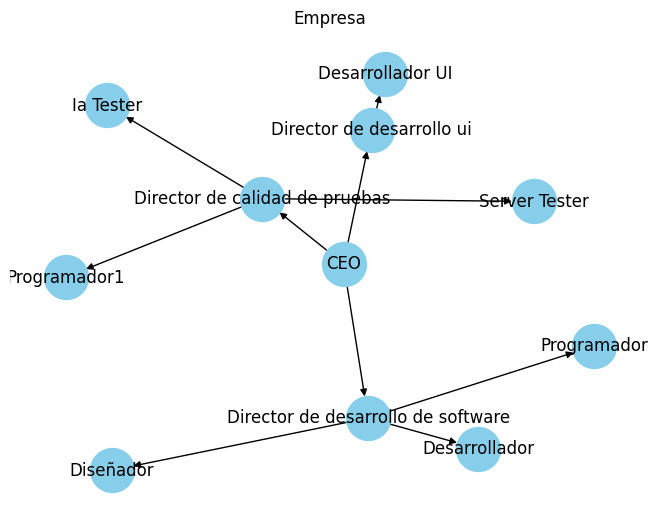

In [14]:
#Método para buscar un trabajador por su cédula y cambiarle su Rol

def cambiarRol(cedula, newRol):
  e = buscarEmpleado(cedula)

  if e is None:
    return print("El empleado no existe")

  Empresa.remove_node(e.Rol)

  addNode(e.Nombre, newRol, e.Cedula, e.Salario, e.Equipo)

cambiarRol("12345677", "Programador")

options = {
    'node_color': 'skyblue',  # Color de los nodos
    'node_size': 1000,        # Tamaño de los nodos
    'with_labels': True       # Mostrar etiquetas de nodos
        }

nx.draw(Empresa, pos = nx.spring_layout(Empresa), **options)
plt.title("Empresa")
plt.show()

a


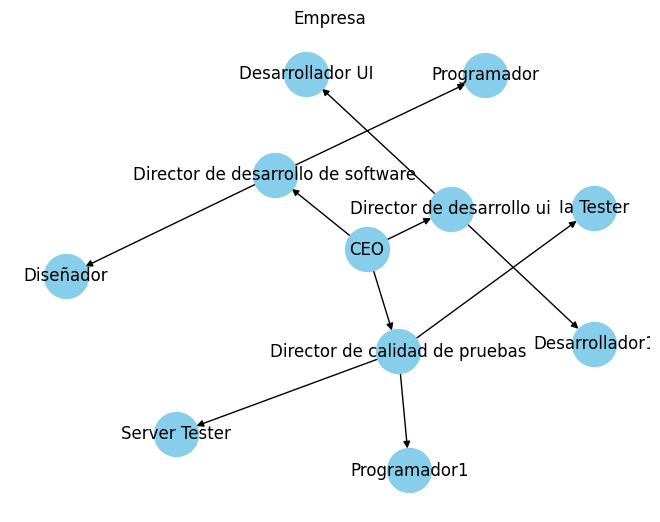

In [15]:
#Método para Cambiar al empleado de equipo

def cambiarEquipo(cedula, newEquipo):

  e = buscarEmpleado(cedula)

  if e is None:
    return print("El empleado no existe")

  Empresa.remove_node(e.Rol)

  addNode(e.Nombre, e.Rol, e.Cedula, e.Salario, newEquipo)

cambiarEquipo("12345673", "Desarrollo UI")

options = {
    'node_color': 'skyblue',  # Color de los nodos
    'node_size': 1000,        # Tamaño de los nodos
    'with_labels': True       # Mostrar etiquetas de nodos
        }

nx.draw(Empresa, pos = nx.spring_layout(Empresa), **options)
plt.title("Empresa")
plt.show()


a


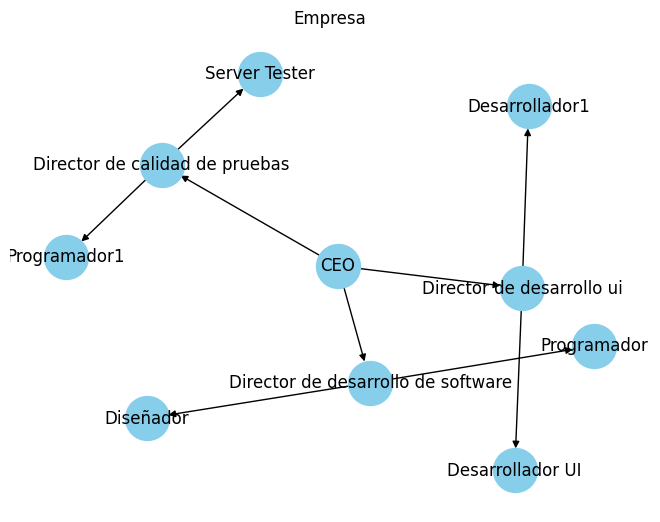

In [16]:
#Método para eliminar al empleado
def eliminarEmpleado(cedula):

  e = buscarEmpleado(cedula)

  if e is None:
    return print("El empleado no existe")

  Empresa.remove_node(e.Rol)

eliminarEmpleado("12345679")

options = {
    'node_color': 'skyblue',  # Color de los nodos
    'node_size': 1000,        # Tamaño de los nodos
    'with_labels': True       # Mostrar etiquetas de nodos
        }

nx.draw(Empresa, pos = nx.spring_layout(Empresa), **options)
plt.title("Empresa")
plt.show()

In [17]:
#Método para crear un subgrafo
#En este caso el subgrafo empieza con el director de grupo como cabeza

def create_subgraphs():
    subgraphs = {}
    leader_node = None
    for node in Empresa.nodes():
        equipo = Empresa.nodes().get(node)["empleado"].Equipo
        if equipo not in subgraphs:
            subgraphs[equipo] = nx.DiGraph(name=equipo)



        for n in Empresa.nodes():

          if Empresa.nodes().get(n)["empleado"].Rol.startswith("Director de " + equipo.lower()):
            leader_node = n
            subgraphs[equipo].add_node(leader_node)
            for neighbor in Empresa.neighbors(leader_node):
                subgraphs[equipo].add_edge(leader_node, neighbor)
            break

    return subgraphs



*   Si se desea ver el subgrafo de otros equipos, simplemente modificar el texto entre comillas con el nombre del equipo en cuestion



In [18]:

DesarrolloSoftware_subgraph = create_subgraphs()["Desarrollo de software"]
CalidadDePruebas_subgraph = create_subgraphs()["Desarrollo UI"]



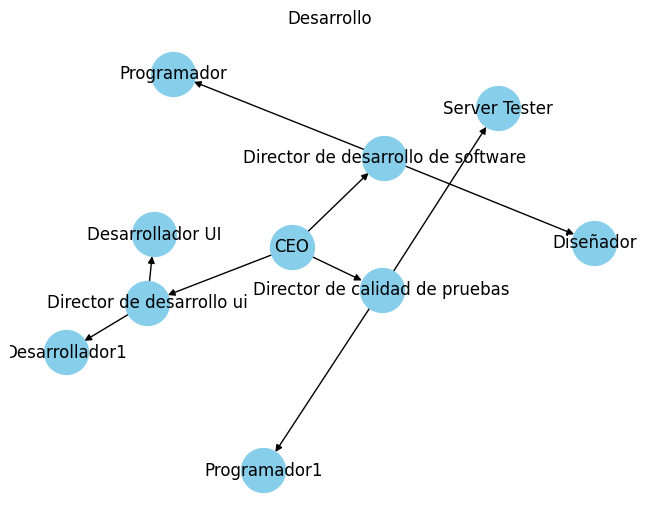

In [23]:

options = {
    'node_color': 'skyblue',  # Color de los nodos
    'node_size': 1000,        # Tamaño de los nodos
    'with_labels': True       # Mostrar etiquetas de nodos
        }

nx.draw(Empresa, pos = nx.spring_layout(Empresa), **options)
plt.title("Desarrollo")
plt.show()